# Show Sentinel-2 Image as RGB and NIR-GB

In previous tutorials, we've used the `show_result` function to quickly visualize our images. In this notebook, we'll take a closer look at how to manually visualize our results by creating custom RGB and NIR-GB images from Sentinel-2 data.

## Objective:

The objective of this tutorial is to guide you through downloading Sentinel-2 imagery and visualizing it as both an RGB image and an NIR-GB image. These visualizations are essential for applications like vegetation monitoring and land cover analysis.

### Key Steps:

A. **Connecting to OpenEO**: Start by connecting to the OpenEO platform to access satellite data.

B. **Loading Sentinel-2 Data**: Load the relevant Sentinel-2 bands for visualization.

C. **Visualizing as RGB**: Combine the red, green, and blue bands to create a true-color RGB image.

D. **Visualizing as NIR-GB**: Highlight vegetation by combining the near-infrared, green, and blue bands.

### Tools You'll Use:

- **OpenEO**: To access and process Sentinel-2 data.
- **Rasterio**: For handling raster data.
- **Matplotlib**: For plotting and visualizing imagery.
- **Numpy**: For normalizing pixel values.

### Learning Outcomes:

By the end of this tutorial, you will:

- Understand how to manually visualize satellite data as RGB and NIR-GB images.
- Learn how to normalize image data for better display.
- Explore the effects of different band combinations on image interpretation.

Let's dive in and start by connecting to OpenEO and loading the Sentinel-2 data.


In [11]:
import openeo
from config import user,passwd,eo_service_url
import io
import rasterio.plot
import numpy as np
from demo_regions import s2
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

## A. Connect to the openeo backend

In [12]:

connection = openeo.connect(eo_service_url) 
connection.authenticate_basic(username=user, password=passwd)

<Connection to 'https://openeo.digitalearth.se/' with BasicBearerAuth>

## B. Loading Sentinel 2 Data
We start out by loading a datacube with a Sentinel-2 product over Karlstad with a timespan that results in one image. The details will be explained in the cell after the code-cell.

In [13]:
res = connection.load_collection(
    collection_id=s2.s2_msi_l2a,
    spatial_extent=s2.bbox.karlstad_mini_land,
    temporal_extent=s2.timespans.one_image,
    bands=['b04', 'b03', 'b02', 'b08'],
)

### Explanation of the code above:

In this step, we are loadig a Sentinel-2 datacube focused on the Karlstad region, specifying a timespan that results in a single image. The bands selected are:

- **b04 (Red)**: Useful for identifying vegetation and land cover.
- **b03 (Green)**: Complements the red band in analyzing vegetation.
- **b02 (Blue)**: Combined with red and green to create true-color imagery.
- **b08 (NIR - Near-Infrared)**: Crucial for monitoring vegetation health and distinguishing between land and water. Used in next exercise

These bands allow us to create both RGB (true-color) and NIR-GB (false-color) images, which we will visualize in subsequent steps.


In [14]:
# Download the cube as gtiff image data
s2_image_data2 = res.download(format="gtiff")

In [15]:
# Open the image data using rasterio
filelike = io.BytesIO(s2_image_data2)
im = rasterio.open(filelike)

The order in which we specify the bands matters. rasterio.open() will load these bands in the same order we requested them. So, the first band in the list (b04, red) is assigned to index 1 when we call im.read(1). The rests are:

	- im.read(2) reads the second band (i.e., b03, the green band).
	- im.read(3) reads the third band (i.e., b02, the blue band).
	- im.read(4) reads the fourth band (i.e., b08, the NIR band).

## C. Visualizing an image as RGB:
 

1. **Load the Bands**:
   - Load the red (b04), green (b03), and blue (b02) bands from the Sentinel-2 datacube.
   - These bands correspond to the visible spectrum and are used to create a true-color RGB image.

2. **Normalize the Data**:
   - The raw pixel values of satellite imagery often exceed the 0-255 range used for display.
   - Normalize these values to fit within this range, ensuring the image displays correctly on screens.

3. **Stack the Bands**:
   - Combine the normalized red, green, and blue bands into a single 3D array to create the RGB image.

4. **Display the Image**:
   - Use `matplotlib` to plot the RGB image, providing a visual representation of the area using true-color imagery.

This process allows you to create and view a true-color image from satellite data, which is useful for interpreting land cover and other features as they appear to the human eye.


In [16]:
# 1. Read the bands as arrays
r = im.read(1)  # Band 4 (Red)
g = im.read(2)  # Band 3 (Green)
b = im.read(3)  # Band 2 (Blue)
nir = im.read(4) # Band 8 (NIR)
print(r)
print(g)
print(b)
print(nir)

[[238. 254. 312. ... 465. 410. 438.]
 [273. 330. 332. ... 493. 367. 333.]
 [321. 383. 313. ... 298. 230. 279.]
 ...
 [214. 228. 245. ... 233. 158. 217.]
 [277. 290. 269. ... 238. 193. 195.]
 [244. 247. 262. ... 187. 180. 184.]]
[[433. 401. 518. ... 656. 606. 605.]
 [485. 462. 520. ... 697. 563. 501.]
 [477. 587. 597. ... 417. 345. 335.]
 ...
 [325. 322. 331. ... 291. 290. 314.]
 [328. 353. 363. ... 283. 266. 293.]
 [313. 328. 363. ... 327. 331. 319.]]
[[472. 479. 515. ... 572. 573. 560.]
 [510. 433. 492. ... 590. 539. 554.]
 [561. 593. 558. ... 502. 462. 501.]
 ...
 [493. 438. 521. ... 462. 440. 462.]
 [508. 503. 509. ... 427. 412. 445.]
 [512. 496. 526. ... 477. 437. 490.]]
[[1860. 1696. 1994. ... 3212. 3038. 2644.]
 [1888. 1950. 2386. ... 3176. 2288. 2108.]
 [1968. 2304. 2382. ... 1456.  727.  925.]
 ...
 [ 104.  117.  197. ...  106.   74.   77.]
 [ 137.  136.  201. ...   97.   68.   84.]
 [ 156.  163.  197. ...  101.   88.   81.]]


As we saw from above the r, g, b arrays are holding large numbers which don’t fit within the standard 8-bit color range used for displaying images on most screens. Most computer displays and image processing software expect pixel values for images to be in the range of 0 to 255, where:

	0 means the darkest possible value (black),
	255 means the brightest possible value (white).

Therefore, we will normalize these raw pixel values from their original range to the displayable range 0-255.


In [17]:
# 2. Normalize the data to the range 0-255 for display
def normalize(array):
    array_min, array_max = np.percentile(array, (1, 99))  # Clip values between 1st and 99th percentile
    array = np.clip(array, array_min, array_max)  # Clip the extreme values
    return ((array - array_min) / (array_max - array_min) * 255).astype(np.uint8)


In [18]:
r_normalized = normalize(r)
g_normalized = normalize(g)
b_normalized = normalize(b)
nir_normalized = normalize(nir)

print(r_normalized)
print(g_normalized)
print(b_normalized)
print(nir_normalized)

[[10 12 20 ... 40 33 36]
 [15 22 23 ... 43 27 23]
 [21 29 20 ... 18  9 16]
 ...
 [ 7  9 11 ... 10  0  8]
 [15 17 14 ... 10  5  5]
 [11 12 13 ...  4  3  3]]
[[28 23 41 ... 62 54 54]
 [36 33 41 ... 68 48 38]
 [35 51 53 ... 26 15 13]
 ...
 [12 11 13 ...  7  6 10]
 [12 16 18 ...  5  3  7]
 [10 12 18 ... 12 13 11]]
[[15 17 22 ... 32 32 30]
 [22  9 19 ... 35 26 29]
 [30 35 29 ... 20 14 20]
 ...
 [19 10 23 ... 14 10 14]
 [21 20 21 ...  8  6 11]
 [22 19 24 ... 16 10 18]]
[[126 115 135 ... 220 208 181]
 [128 132 163 ... 218 156 143]
 [134 157 162 ...  98  47  61]
 ...
 [  4   5  10 ...   4   2   2]
 [  6   6  11 ...   3   1   3]
 [  8   8  10 ...   4   3   2]]


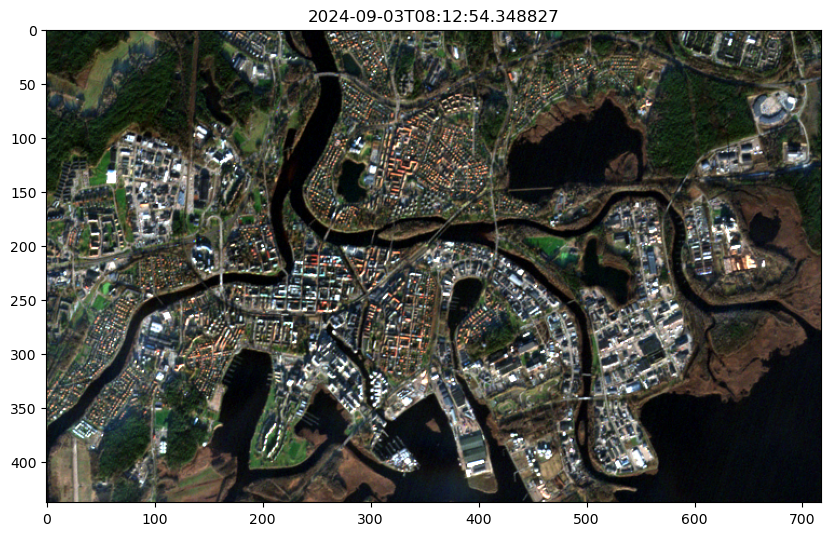

In [19]:
# 3. Stack the bands into an RGB image
rgb = np.dstack((r_normalized, g_normalized, b_normalized))

# 4. Display the RGB image using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(rgb)
ax.set_title(im.tags()["datetime_from_dim"])
plt.show()

### Repeating Steps 3 and 4 with NIR instead of Red:

In the previous step, we created a standard RGB image by stacking the red, green, and blue bands. This produces a true-color image that closely resembles what the human eye would see. However, satellite imagery offers more than just visible light; it includes other spectral bands that can reveal additional information about the Earth's surface.

#### Why Use the NIR Band?

The Near-Infrared (NIR) band, which is not visible to the human eye, is particularly valuable in remote sensing because it is highly sensitive to vegetation. Healthy plants reflect a lot of NIR light, making it a powerful tool for assessing vegetation health, detecting water bodies, and distinguishing between different land cover types.

#### What We’re Doing:

In this step, we replace the red band with the NIR band to create an NIR-GB image:

- **NIR** (Near-Infrared) - replaces the red band, highlighting vegetation.
- **G** (Green) - remains the same, helping to distinguish different vegetation types.
- **B** (Blue) - also remains the same, providing contrast for water bodies and atmospheric conditions.

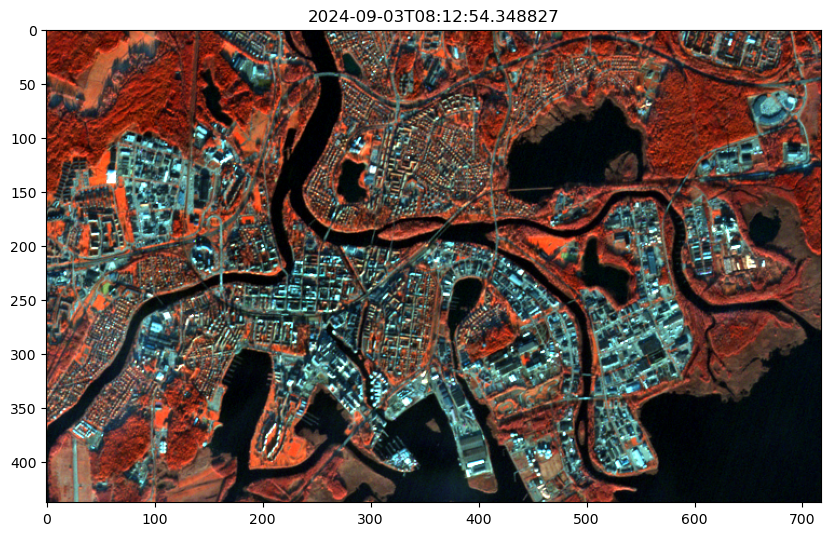

In [20]:
# 3. Stack the bands into an RGB image
nirgb = np.dstack((nir_normalized, g_normalized, b_normalized))

# 4. Display the RGB image using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(nirgb)
ax.set_title(im.tags()["datetime_from_dim"])
plt.show()

## Summary:

In this notebook, you have learned how to visualize Sentinel-2 imagery using different band combinations to reveal various features of the Earth's surface:

- **RGB Visualization**: You created a true-color image using the red, green, and blue bands, which resembles what the human eye would see.
- **NIR-GB Visualization**: You replaced the red band with the Near-Infrared (NIR) band to highlight vegetation and water bodies, providing insights that are not visible in standard RGB images.
